# `GeoPandas` 是 `Pandas` 的扩展：

- 官方文档：http://geopandas.org/index.html
- [Python空间数据可视化利器之Geopandas](https://zhuanlan.zhihu.com/p/22914622)
- [使用Python，GeoJSON和GeoPandas开始地理空间分析](https://python.freelycode.com/contribution/detail/1020)

在 Windows 下安装 `fiona`，我仅仅使用以下方法安装成功：

```sh
pip install https://download.lfd.uci.edu/pythonlibs/n1rrk3iq/Fiona-1.7.11.post1-cp36-cp36m-win_amd64.whl
```

In [5]:
import fiona

In [6]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as geo

加载存储在形状文件（`.shp`）中的非洲各国的坐标数据：

In [25]:
africa_map = geo.GeoDataFrame.from_file('Africa_SHP/Africa.shp')

In [26]:
africa_map.head()

,ID,CODE,COUNTRY,geometry
0,1,ALG,Algeria,"POLYGON ((-5.7636199999979 25.58624999999302, ..."
1,2,ANG,Angola,"POLYGON ((13.36632442474365 -8.32172966003418,..."
2,3,ANG,Angola,POLYGON ((12.80576000000292 -4.806490000002668...
3,4,ANG,Angola,POLYGON ((11.76834011077881 -16.79932975769043...
4,5,ANG,Angola,POLYGON ((12.89840030670166 -5.988018989562988...


In [13]:
africa_map.head()

,ID,CODE,COUNTRY,geometry
0,1,ALG,Algeria,"POLYGON ((-5.7636199999979 25.58624999999302, ..."
1,2,ANG,Angola,"POLYGON ((13.36632442474365 -8.32172966003418,..."
2,3,ANG,Angola,POLYGON ((12.80576000000292 -4.806490000002668...
3,4,ANG,Angola,POLYGON ((11.76834011077881 -16.79932975769043...
4,5,ANG,Angola,POLYGON ((12.89840030670166 -5.988018989562988...


In [27]:
africa_map.columns

Index(['ID', 'CODE', 'COUNTRY', 'geometry'], dtype='object')

传入参数`column` 来指定生成每个几何多边形的颜色时所用的字段

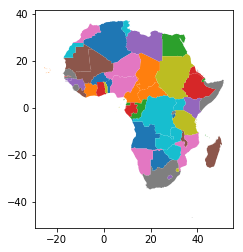

In [14]:
africa_map.plot(column='CODE')

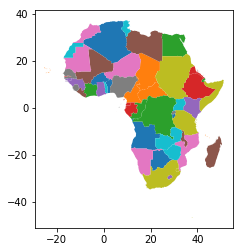

In [31]:
africa_map.plot(column= 'COUNTRY')

`sep='\t'` 用于非逗号隔开的 `.tsv` 文件。

In [15]:
africa_populations = pd.read_csv('Africa_populations.tsv', sep='\t')

In [16]:
africa_map = pd.merge(africa_map,africa_populations,left_on='COUNTRY',right_on='Country_Name')

C:\Anaconda3\lib\site-packages\geopandas\plotting.py:381: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


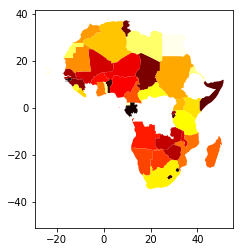

In [17]:
africa_map.plot(column='Population',colormap='hot') # 人口最稠密的国家用白色凸显

In [19]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


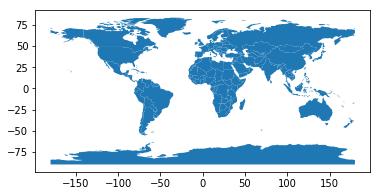

In [20]:
world.plot()

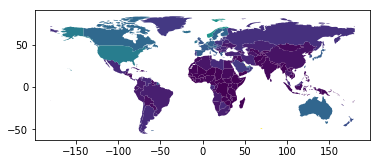

In [21]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap');

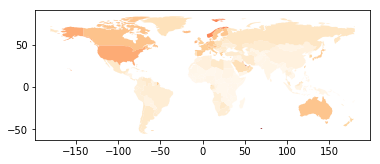

In [22]:
world.plot(column='gdp_per_cap', cmap='OrRd');

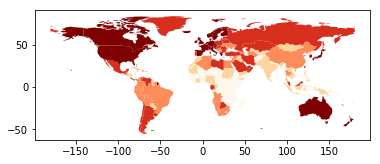

In [23]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles');